In [1]:
import numpy as np
from matplotlib import pyplot as plt

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io

from ase.io import read
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal
from ase.build import bulk
from scipy.optimize import minimize

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io
from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [2]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

In [3]:
KS_TE = []
for i in np.arange(0,30,1):
    with open('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_8cd/DATA2/Si'+str(i)+'.out') as D:
        k = [match for match in D if "!    total energy" in match]
    KS_te = str(k).split()[4]
    KS_TE.append(float(KS_te)) 
ks_te = np.asarray(KS_TE)

In [4]:
def min_energy(x0, *args):
        KS_TE, rho, ions = args
        KE = Functional(type='KEDF',name='WT', rho0=x0)
        grid = DirectGrid(lattice=ions.cell, nr=[len(rho),len(rho),len(rho[0,0])])
        PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=10)
        rho_ini = DirectField(grid=grid)
        rho_ini[:] = ions.get_ncharges()/ions.cell.volume
        
        evaluator = TotalFunctional(KE=KE, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
        # optimization_options = {'econv' : 1e-5*ions.nat}
        # opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options, 
        #                    optimization_method = 'TN')
        # rho = opt.optimize_rho(guess_rho=rho_ini)
        OF_TE = evaluator.Energy(rho=rho, ions=ions)
        # OF_KE = KE(rho).energy
        diff = np.abs(KS_TE*1/2-OF_TE)
        print(diff)
        return diff

In [6]:
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')
l = np.linspace(0.8, 1.4, 30)
delta_E = []
R0 = []
vol = []
for n in np.arange(0,30,1):
    print('NEW STRUCTURE')
    i = int(n)
    rho = io.read_density('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_8cd/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(bulk('Si', 'diamond', a=5.43, cubic=True))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    KS_TE = ks_te[i]
    minn = minimize(min_energy, 0.01, args = (KS_TE, rho, ions), method='Powell', bounds=[[0,1]], options={'ftol' : 1e-6})
    VOLUME = ions.get_volume()
    vol.append(VOLUME)
    delta_E.append(minn.fun)
    R0.append(minn.x)

NEW STRUCTURE
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.7292584443193668
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
1.6043774668416049
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
1.8195271748421256
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
1.316241837022691
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.9460238111123616
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.5116025585000017
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.20720699826834732
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.019927315294140158
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.2722909206311357
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
0.07289619563860583
setting key: Si -> /Users/valeria

Text(0, 0.5, '$ρ_{0}$')

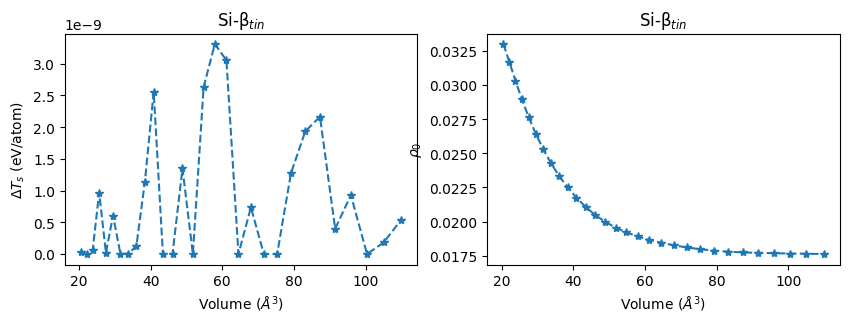

In [7]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/4,np.asarray(delta_E)*1/4,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/4,np.asarray(R0),'*--')
axs[0].set_title('Si-\u03B2$_{tin}$')
axs[1].set_title('Si-\u03B2$_{tin}$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta T_{s}$ (eV/atom)')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [8]:
R0

[array([0.03301583]),
 array([0.03172061]),
 array([0.03033205]),
 array([0.02896259]),
 array([0.02765964]),
 array([0.02643852]),
 array([0.02531038]),
 array([0.02428191]),
 array([0.02334909]),
 array([0.0225073]),
 array([0.02174966]),
 array([0.02106842]),
 array([0.02047829]),
 array([0.01997715]),
 array([0.01955776]),
 array([0.01920482]),
 array([0.01890774]),
 array([0.01865744]),
 array([0.01844376]),
 array([0.01826046]),
 array([0.01810445]),
 array([0.01797444]),
 array([0.01786896]),
 array([0.01778981]),
 array([0.01773553]),
 array([0.01770514]),
 array([0.01767902]),
 array([0.01765719]),
 array([0.01763799]),
 array([0.017619])]

In [9]:
np.save('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_8cd/DATA2/rho0_TE', np.asarray(R0))